# Gráficos y métricas RM - Dataset 1

In [10]:
import numpy as np
import pandas as pd

from statsmodels.iolib.smpickle import save_pickle

from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
dataset = pd.read_csv("datos/datos_dptos_reales.csv")
dataset

,fecha,provincia,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
0,2012-12-31,CHUBUT,BIEDMA,5785,93378,30168,48447,16071,193849,649130.0,19.80,58.06,58.40,46.40,18.10,12.40,6.70
1,2013-12-31,CHUBUT,BIEDMA,5376,82998,25341,47350,26832,187897,620176.0,19.60,56.68,64.70,226.50,19.90,14.20,8.80
2,2014-12-31,CHUBUT,BIEDMA,4785,82706,29379,35155,29900,181925,649130.0,20.10,61.19,60.50,331.30,20.60,14.70,9.20
3,2015-12-31,CHUBUT,BIEDMA,4440,89262,29663,35437,32343,191145,672480.0,18.58,58.18,58.70,114.20,22.20,15.80,10.20
4,2016-12-31,CHUBUT,BIEDMA,4452,82295,33662,33470,21326,175205,653800.0,17.99,59.93,57.50,88.90,25.20,18.60,12.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2016-12-31,CHUBUT,TELSEN,4896,80262,26471,39243,20290,171162,637000.0,20.20,53.55,50.80,273.33,17.47,11.57,5.77
161,2017-12-31,CHUBUT,TELSEN,4640,77556,27296,36570,17750,163812,637000.0,19.11,56.01,47.17,220.03,16.60,10.93,5.03
162,2018-12-31,CHUBUT,TELSEN,4832,79117,28366,37558,21933,171806,637000.0,20.38,54.64,47.93,201.40,17.63,11.33,5.03
163,2019-12-31,CHUBUT,TELSEN,4781,80109,28428,38109,17731,169158,613021.5,16.88,53.83,47.57,119.47,17.53,11.17,4.83


<AxesSubplot:>

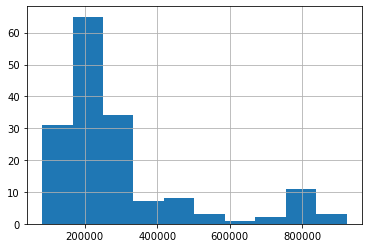

In [3]:
dataset['total_ovinos'].hist()

<AxesSubplot:xlabel='total_ovinos'>

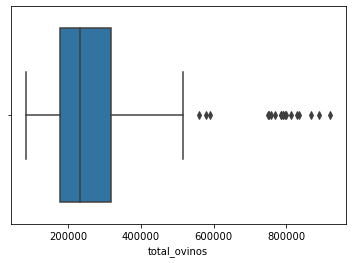

In [4]:
sns.boxplot(x=dataset['total_ovinos'])

<AxesSubplot:>

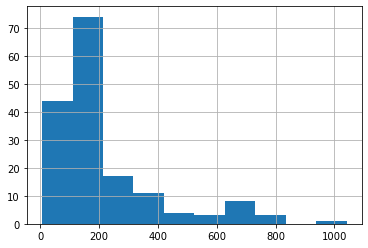

In [5]:
dataset['cant_lluvia'].hist()

<AxesSubplot:xlabel='cant_lluvia'>

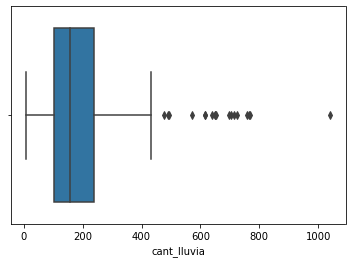

In [6]:
sns.boxplot(x=dataset['cant_lluvia'])

## Primera Predicción: Lana

Variables independientes: 
- Cantidad total de lluvia acumulada de cada año (mm)
- Cantidad total de ovinos de cada año (animales)

Variables dependientes:
- Kilos de lana producidos

Primero, estandarizamos el dataset. En este caso los datos respecto a la lluvia, ovinos y lana. 

In [11]:
num_attrs = ["cant_lluvia", "total_ovinos"]
pipeline = ColumnTransformer([("numeric", StandardScaler(), num_attrs)])
X_primera_prediccion = pipeline.fit_transform(dataset)

standard_scaler = StandardScaler()
l_values = dataset[['kilos_lana']]
scaled_values = standard_scaler.fit(l_values)
y_primera_prediccion = standard_scaler.transform(l_values)

Luego sobre esos datos estandarizados armamos el conjunto de entrenamiento y prueba para entrenar el modelo que nos servira para hacer las predicciones.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X_primera_prediccion, 
                                                y_primera_prediccion, 
                                                test_size=0.20,
                                                random_state=0
                                            )

Con K-Folds de 5 splits para entrenar, en vez de pasarle todos los registros directamente al modelo, haremos así:
    - Iterar 5 veces:
        - Apartaremos 1/5 de muestras, es decir 26.
        - Entrenamos al modelo con el restante 4/5 de muestras = 106.
        - Mediremos el score obtenido sobre las 26 que habíamos apartado.
    - Esto quiere decir que hacemos 5 entrenamientos independientes.
    - El score final será el promedio de los 5 scores anteriores.

In [13]:
kf = KFold(n_splits=5)

Al cabo de esas 5 iteraciones, obtenemos 5 score que deberían ser “similares” entre sí, esto sería un **indicador de que el modelo está funcionando bien.** Lo siguiente es crear el modelo y entrenarlo

In [14]:
model_lana = linear_model.LinearRegression()

In [15]:
model_lana.fit(X_train, y_train)

LinearRegression()

Comparamos los resultados obtenidos en el modelo inicial (entrenamiento) y en el cross validation. **Vemos que son similares.**

In [16]:
score = model_lana.score(X_train,y_train)
print("Metrica del modelo", score)

Metrica del modelo 0.8893552573829171


In [18]:
scores = cross_val_score(model_lana, X_train, y_train, cv=kf)
print("Metricas cross_validation", scores)

Metricas cross_validation [0.91638952 0.90383321 0.81649507 0.81181367 0.84079455]


In [19]:
print("Media de cross_validation", scores.mean())

Media de cross_validation 0.8578652036552616


Finalmente hacemos predict sobre el Conjunto de Test y veremos que también obtenemos **buen score**.

In [20]:
pred_model_lana = model_lana.predict(X_test)

In [25]:
score_pred = r2_score(y_test, pred_model_lana)
print("Metrica en Test", score_pred)

Metrica en Test 0.7070794441284336


Guardamos el modelo para utilizarlo en la aplicación

In [26]:
save_pickle(model_lana,'modelos/modelo_prediccion_lana_1')

### Métricas

#### Score

*Score*: Todos los algoritmos incluyen un método "score" que provee el resultado de un criterio de evaluación por defecto para aquel problema al que están orientados. De esta manera, el método score de un modelo de clasificación basado en árbol de decisión, devuelve la precisión del modelo, entendida como el porcentaje de valores clasificados correctamente con respecto al total de elementos. O una regresión lineal devuelve el coeficiente de determinación, o R2, entendida como el porcentaje de la variancia de la variable dependiente que es predecible a partir de la variable independiente.

In [27]:
print('Exactitud del modelo en entrenamiento:')
print(str(round(model_lana.score(X_train, y_train),4))+'%')

Exactitud del modelo en entrenamiento:
0.8894%


Interpretación: En este caso estamos usando los valores de entrenamiento, y el modelo predice con un 89% de exactitud.  

In [28]:
print('Exactitud del modelo en test:')
print(str(round(model_lana.score(X_test, y_test),4))+'%')

Exactitud del modelo en test:
0.7071%


Interpretación: En este caso estamos usando los valores de prueba, y el modelo predice con un 71% de exactitud. 

#### Varianza explicada

*Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. La mejor puntuación posible es 1.0, los valores más bajos son peores. Sin embargo hay que considerar que la varianza NO debe ser muy alta sino estariamos corriendo riesgo de overfitting. Dentro de sklearn el método es **explained_variance_score**. 

In [29]:
print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, pred_model_lana),4)))

Varianza Explicada:
0.7073


Interpretación: El modelo explica la variable de salida (lana) en un 71%.

#### Error medio absoluto

*Error medio absoluto* (**MAE**): Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_absolute_error**.

In [31]:
print('MAE:')
print(str(round(mean_absolute_error(y_test, pred_model_lana),4)))

MAE:
0.2722


Interpretación: Nos dice que el modelo se equivoca en promedio en un 27% (kg), cada vez que predice un valor de lana. 

#### Error cuadrático medio

*Error cuadrático medio* (**MSE**): Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_squared_error**.

In [32]:
print('MSE:')
print(str(round(mean_squared_error(y_test, pred_model_lana),4)))

MSE:
0.13


Interpretación: Nos dice que el modelo se equivoca en promedio en un 13%, cada vez que predice un valor de lana, en este caso penalizando los errores grandes. 

#### Raíz cuadrada del MSE

*Raíz cuadrada de la media del error al cuadrado* (**RMSE**): Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_squared_error** y a este se le saca la raíz cuadrada. 

In [33]:
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, pred_model_lana),4)),4)))

RMSE:
0.3606


Interpretación: Nos dice que el modelo se equivoca en promedio un 36%(kg), cada vez que predice un valor de lana.

#### R cuadrado

*R cuadrado* (**R2**): Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El R cuadrado, también llamado coeficiente de determinación, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. Dentro de sklearn el método es **r2_score**.

In [34]:
print('R2:')
print(str(round(r2_score(y_test, pred_model_lana),4)))

R2:
0.7071


Interpretación: El modelo explica en un 71% la variable de salida, en este caso los kilos de lana.

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

#### R cuadrado ajustado

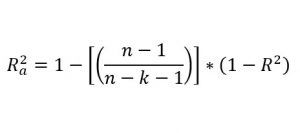
https://economipedia.com/definiciones/r-cuadrado-ajustado-coeficiente-de-determinacion-ajustado.html

In [36]:
def r2_ajustado(n,k,r2):
    return round(1-((n-1)/(n-k-1))*(1-r2),4)

r2 = r2_score(y_test, pred_model_lana)
k = 2
n = len(y_test)
resultado = r2_ajustado(n,k,r2)
print('R2 ajustado:')
print(resultado)

R2 ajustado:
0.6876


Interpretación: El modelo explica en un 69% la variable de salida, en este caso los kilos de lana. Es decir la bondad de ajuste es del 69%.

### Gráficos predición de lana

#### Gráfico regresión lineal múltiple

In [52]:
######################################## Data preparation #########################################
X = X_primera_prediccion.reshape(-1,2)
Y = y_primera_prediccion

In [53]:
x_pred = np.linspace(-0.50, 5.45, 30)   # range of cant_lluvia values
y_pred = np.linspace(-1.10, 3.30, 30)  # range of total_ovinos values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [54]:
######################## Prepare model data point for visualization ###############################
x = X[:, 0]
y = X[:, 1]
z = Y

In [55]:
################################################ Train #############################################
predicted = model_lana.predict(model_viz)

In [56]:
############################################## Evaluate ############################################
r2 = model_lana.score(X, Y)

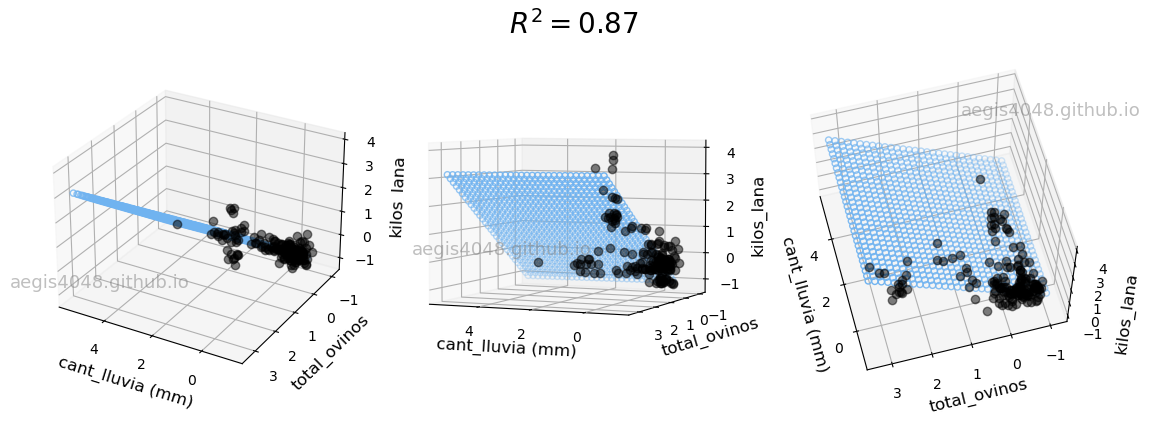

In [57]:
############################################## Plot ################################################
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x.flatten(), y.flatten(), z.flatten(), color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('cant_lluvia (mm)', fontsize=12)
    ax.set_ylabel('total_ovinos', fontsize=12)
    ax.set_zlabel('kilos_lana', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

#### Gráfico predicción vs real

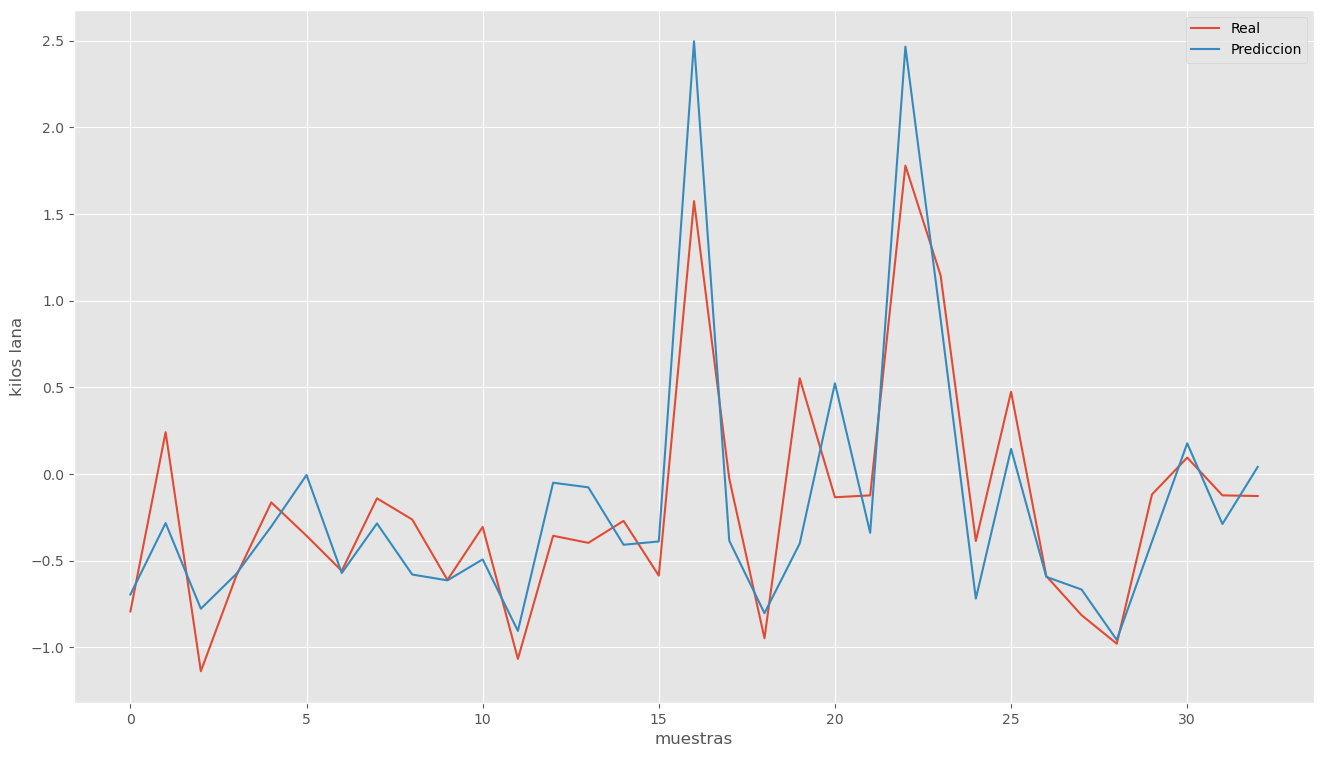

In [45]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(pred_model_lana)),pred_model_lana,label="Prediccion")
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()